# Ejercicio 6

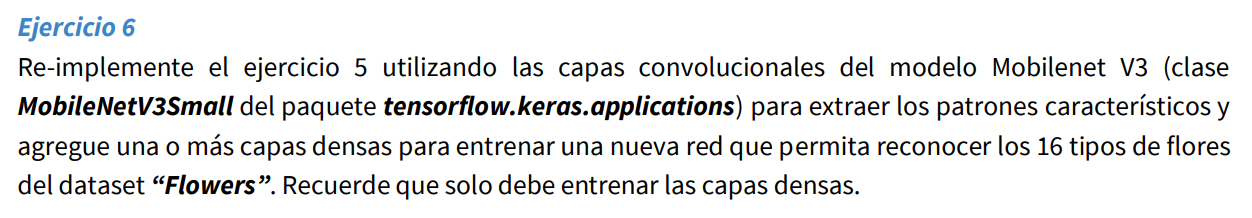

### Importe de librerias y lectura de datos

In [1]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from skimage import io
from skimage.transform import rotate
import numpy as np
import glob
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from ClassEpochTiming import EpochTiming

c:\Users\VICTUS\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
from tensorflow.keras.applications import MobileNetV3Small
#from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten  , Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt

In [4]:
# constantes para arquitectura, generación datos y entrenamiento/validacion
IMG_SIZE = (96, 96, 3)  # tamaño de la imagen de entrada
N_CLASSES = 16          # cantidad de clases a identificar
LOTES = 64             # tamaño de lotes para entrenamiento y testeo 
ALFA = 0.00005           # tasa de entrenamiento
EPOCAS = 250          # cantidad de epocas a entrenar como máximo
PACIENCIA = 25          # parámetro para parada temprana
SEP_TRAIN_TEST = 0.2    # división en entrenamiento y validación 

# %% construye el modelo
# obtiene la arquitectura para el modelo pre-entrenado
feature_model = MobileNetV3Small(
    #input_shape=IMG_SIZE,
    minimalistic=False,
    #include_top=False,
    weights="imagenet",
    include_preprocessing=True,
)

c:\Users\VICTUS\anaconda3\Lib\site-packages\keras\src\applications\mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


In [5]:

# construye el modelo de manera funcional
layers = Flatten() (feature_model.output)
layers = Dense(256, activation="relu")(layers)
layers = BatchNormalization()(layers)
layers = Dropout(0.2)(layers)
output = Dense(N_CLASSES, activation='softmax')(layers)

model = Model(inputs=feature_model.input, outputs=output)

In [6]:
# The newly added layers are initialized with random values.
# Make sure based model remain unchanged until newly added layers weights get reasonable values.
for layer in feature_model.layers:
    layer.trainable = False

#Optimizer
opt = Adam(learning_rate=ALFA)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


### Entrenamiento del modelo

In [7]:
# %% Entrenamiento del modelo 

IMAGES_DIR = 'C:\\Users\\VICTUS\\Documents\\2024\\Deep_Learning_UNLP\\Datos\\flowers'

# construye un generador de imagenes para dividir en entrenamiento y validación
data_generator = ImageDataGenerator(
    validation_split=SEP_TRAIN_TEST
)

In [8]:
# generador para entrenamiento a partir de la carpeta indicada en IMAGES_DIR
train_iter = data_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory=IMAGES_DIR, 
            class_mode='categorical',
            batch_size=LOTES,
            subset='training'   # asigna subconjunto segun validation_split del ImageDataGenerator
            )

valid_iter = data_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory=IMAGES_DIR, 
            class_mode='categorical',
            batch_size=LOTES,
            subset='validation' # asigna subconjunto segun validation_split del ImageDataGenerator
            )

Found 12599 images belonging to 16 classes.
Found 3141 images belonging to 16 classes.


In [9]:
# Callback para parada temprana
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=PACIENCIA,  
                           restore_best_weights=True)

H = model.fit(
    train_iter,
    validation_data=valid_iter,
    validation_steps= 16,
    epochs=EPOCAS,
    callbacks=[early_stop])

Epoch 1/250


c:\Users\VICTUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


197/197 ━━━━━━━━━━━━━━━━━━━━ 100s 468ms/step - accuracy: 0.1029 - loss: 2.7496 - val_accuracy: 0.2275 - val_loss: 2.7388
Epoch 2/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 32s 160ms/step - accuracy: 0.2123 - loss: 2.5045 - val_accuracy: 0.2988 - val_loss: 2.6261
Epoch 3/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 27s 135ms/step - accuracy: 0.2897 - loss: 2.3307 - val_accuracy: 0.3369 - val_loss: 2.3897
Epoch 4/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 24s 118ms/step - accuracy: 0.3288 - loss: 2.2132 - val_accuracy: 0.3768 - val_loss: 2.0838
Epoch 5/250


c:\Users\VICTUS\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


197/197 ━━━━━━━━━━━━━━━━━━━━ 31s 156ms/step - accuracy: 0.3579 - loss: 2.1167 - val_accuracy: 0.3848 - val_loss: 2.0484
Epoch 6/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 26s 128ms/step - accuracy: 0.3762 - loss: 2.0355 - val_accuracy: 0.4219 - val_loss: 1.9532
Epoch 7/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 26s 128ms/step - accuracy: 0.3944 - loss: 1.9587 - val_accuracy: 0.4648 - val_loss: 1.8098
Epoch 8/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 24s 117ms/step - accuracy: 0.4045 - loss: 1.9176 - val_accuracy: 0.5217 - val_loss: 1.6659
Epoch 9/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 26s 127ms/step - accuracy: 0.4363 - loss: 1.8407 - val_accuracy: 0.4736 - val_loss: 1.7676
Epoch 10/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 26s 127ms/step - accuracy: 0.4371 - loss: 1.8073 - val_accuracy: 0.4756 - val_loss: 1.7395
Epoch 11/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 24s 120ms/step - accuracy: 0.4549 - loss: 1.7620 - val_accuracy: 0.4785 - val_loss: 1.7148
Epoch 12/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 24s 118ms/step - accuracy: 0.4676 - loss: 1.

### Metricas

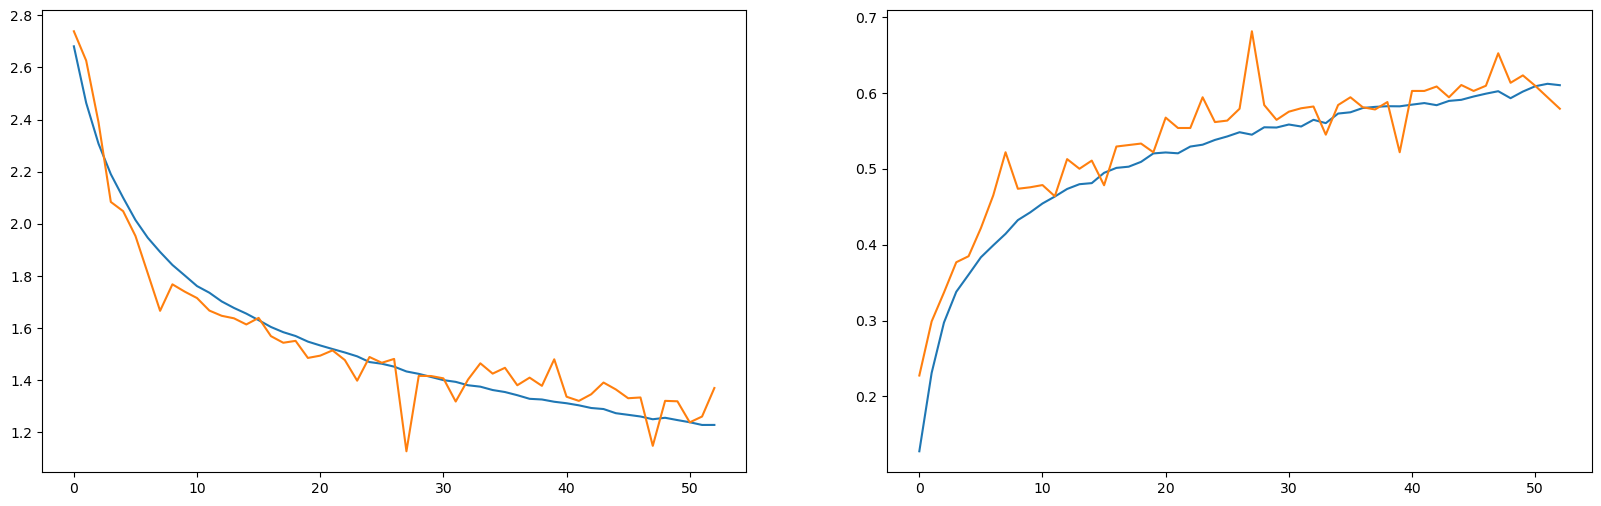

<Figure size 640x480 with 0 Axes>

In [10]:
# dibuja accuracy del progreso del entrenamiento
fig, axs = plt.subplots(1,2, figsize=(20,6))
plt.figure()
axs[0].plot(H.history["loss"], label="train_loss")
axs[0].plot(H.history["val_loss"], label="val_loss")

axs[1].plot(H.history["accuracy"], label="train_acc")
axs[1].plot(H.history["val_accuracy"], label="val_acc")

In [11]:
model.evaluate(train_iter)
model.evaluate(valid_iter)

197/197 ━━━━━━━━━━━━━━━━━━━━ 23s 116ms/step - accuracy: 0.6016 - loss: 1.3109
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 271ms/step - accuracy: 0.5625 - loss: 1.4623


[1.4483041763305664, 0.5628780722618103]